# Give Me Some Credit


> Credit Scoring is used by banks and loan companies to determine the probability of default. In this notebook, we will be using machine learning algorithms to improve credit scoring by predicting if a customer will be in serious financial distress in the next 2 years and the probability that they will be in crisis.





## About Dataset


> Dataset was gotten from Kaggle - https://www.kaggle.com/competitions/GiveMeSomeCredit/data. The dataset contains 150000 rows and 11 columns described below: 

|Variable Name	|Description	|Type |
|----|----|----|
|SeriousDlqin2yrs	|Person experienced 90 days past due delinquency or worse |	Y/N |
|RevolvingUtilizationOfUnsecuredLines|	Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits|	percentage|
|age|	Age of borrower in years|	integer|
|NumberOfTime30-59DaysPastDueNotWorse|	Number of times borrower has been 30-59 days past due but no worse in the last 2 years.	|integer|
|DebtRatio|	Monthly debt payments, alimony,living costs divided by monthy gross income|	percentage|
|MonthlyIncome|	Monthly income|	real|
|NumberOfOpenCreditLinesAndLoans|	Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)|	integer|
|NumberOfTimes90DaysLate|	Number of times borrower has been 90 days or more past due.|	integer|
|NumberRealEstateLoansOrLines|	Number of mortgage and real estate loans including home equity lines of credit|	integer|
|NumberOfTime60-89DaysPastDueNotWorse|	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.	|integer|
|NumberOfDependents|	Number of dependents in family excluding themselves (spouse, children etc.)|	integer|

## Importing needed libraries

In [ ]:
# importing needed libraries
# pandas for loading dataset into a dataframe
import pandas as pd
# numpy for mathematical and statistical problems
import numpy as np
# seaborn, matplotlib, pyplot and plotly's express for visualization
import seaborn as sns 
import matplotlib
from matplotlib import pyplot as plt  
import plotly.express as px
# sklearn's logistic regressor for machine learning
from sklearn.linear_model import LogisticRegression
# import decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
# import kneigbors classifier
from sklearn.neighbors import KNeighborsClassifier
# metrics - accuracy score, precision, recall and f1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, classification_report, confusion_matrix, roc_auc_score
# library for splitting dataset into test and train dataset
from sklearn.model_selection import train_test_split
# pipeline creation library
from sklearn.pipeline import Pipeline
# Standardscaler, minmaxscaler for normalizing data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# set style and palette of plots
sns.set_style('darkgrid')
sns.set_palette('husl')

# The Dataset

In [ ]:
# connecting to my google drive where the datasets are saved
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [ ]:
# loading train dataset from google drive
credit_data = pd.read_csv('/content/gdrive/MyDrive/EHC Project Group 2 /cs-training.csv', index_col = 0)

# displaying first five rows of datasset
credit_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
# loading test dataset from drive
test_data = pd.read_csv('/content/gdrive/MyDrive/EHC Project Group 2 /cs-test.csv', index_col = 0)

# displaying first five rows of test data
test_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [ ]:
# train data shape
print(f"\033[91mShape of Train Date")
display(credit_data.shape)
print()
# test data shape
print(f"\033[91mShape of Test Date")
display(test_data.shape)

Shape of Train Date


(150000, 11)


Shape of Test Date


(101503, 11)

In [ ]:
# information about train dataset
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

1. Dataset has 150000 rows and 11 columns
2. Data types of float and integers
3. Missing values in NumberofDependents and MonthlyIncome

In [ ]:
# information about test dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

1. Dataset has 101503 rows and 11 columns
2. Data types of float and integers
3. Missing values in NumberofDependents and MonthlyIncome

In [ ]:
# number of missing values in each column of train data
print(f"\033[91mMissing values in train dataset")
display(credit_data.isnull().sum())
print()
# number of missing values in each column of test data
print(f"\033[91mMissing values in test dataset")
display(test_data.isnull().sum())

Missing values in train dataset


SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


Missing values in test dataset


SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

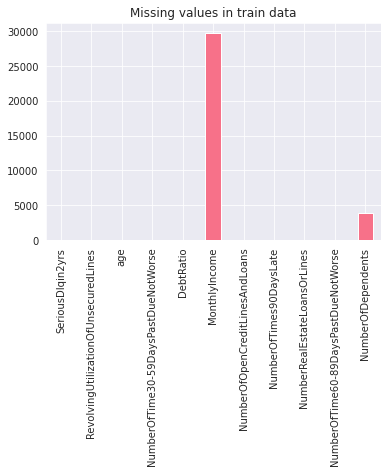

In [ ]:
credit_data.isnull().sum().plot(kind = 'bar')
plt.title('Missing values in train data')
plt.show()

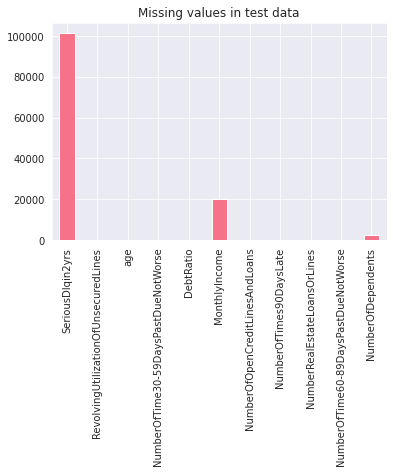

In [ ]:
test_data.isnull().sum().plot(kind = 'bar')
plt.title('Missing values in test data')
plt.show()

There are 29731 missing values in the MonthlyIncome column and 3924 missing values in the NumberOfDependents column in the training datasets.
All these are going to be handled in the data cleaning and preprocessing stage.
There are 20103 missing values in the MonthlyIncome column and 2626 missing values in the NumberOfDependents column in the test dataset.
The SeriousDlqin2yrs column of the test dataset contains missing data in all rows. This is because that is the target column and it will be dropped.
All these are going to be handled in the data cleaning and preprocessing stage.

# Exploratory Data Analysis

In [ ]:
# statistical summary for train dataset
credit_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
# statistical summary for test_data
test_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


#### Correlation

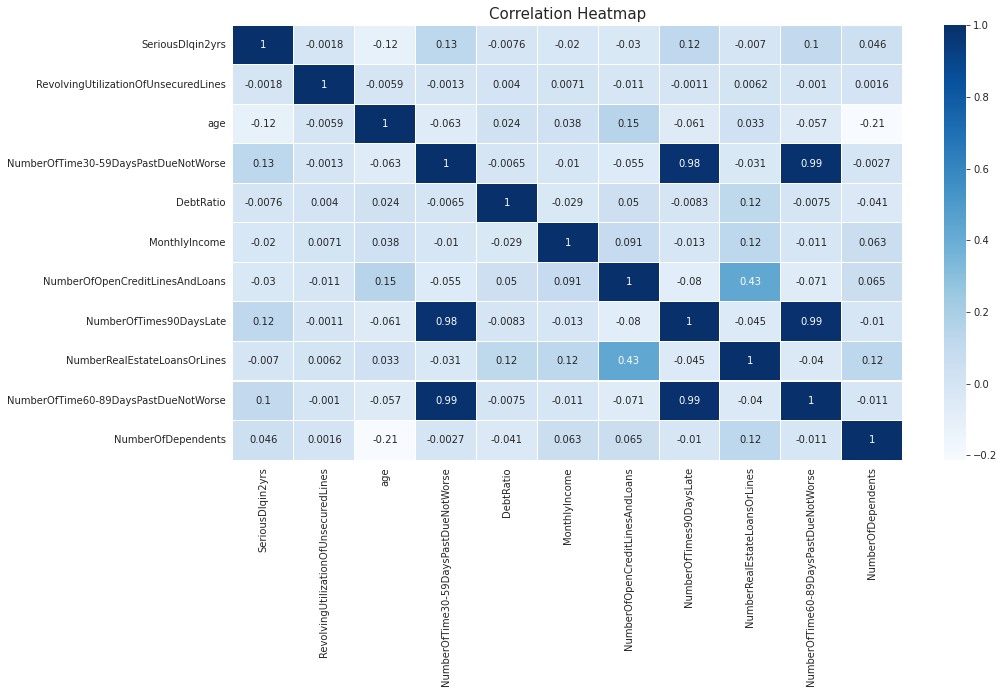

In [ ]:
# correlation 
corr = credit_data.corr()
# correlation heatmap
plt.figure(figsize = (15, 8))
g = sns.heatmap(corr, annot = True, cmap = 'Blues', linewidths = 0.1)
plt.title('Correlation Heatmap', size = 15)
plt.show()

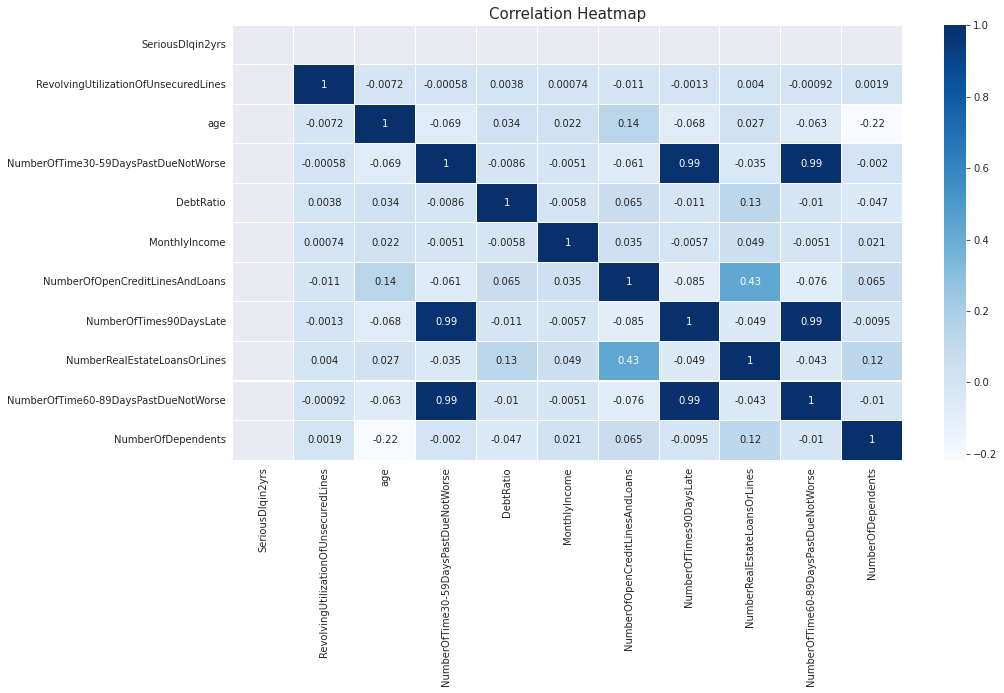

In [ ]:
# correlation test data
corr = test_data.corr()
# correlation heatmap
plt.figure(figsize = (15, 8))
g = sns.heatmap(corr, annot = True, cmap = 'Blues', linewidths = 0.1)
plt.title('Correlation Heatmap', size = 15)
plt.show()

There is a high correlation between:
1. NumberofTimes90DaysLate and NumberofTimes30-59DaysPastDueNotWorse
2. NumbeofTimes60-89DaysPastDueNotWorse and NumberofTimes30-59DaysPastDueNotWorse
3. NumberofTimes60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate
One of the highly correlated columns will be dropped later

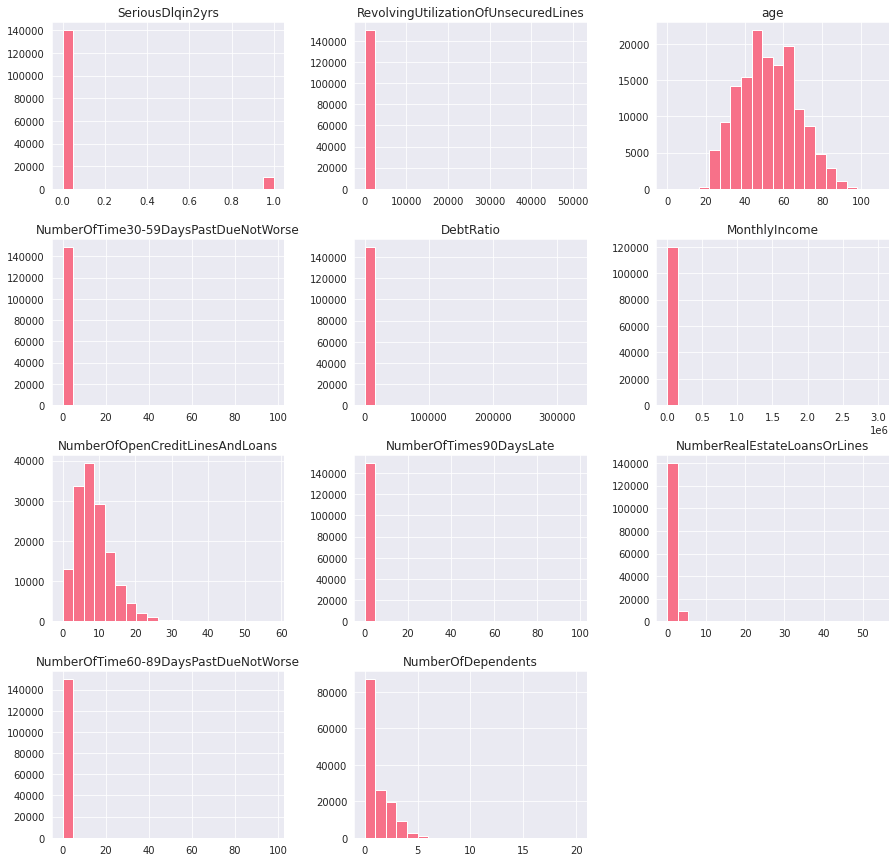

In [ ]:
# creating a histogram for all numeric columns in train set
credit_data.hist(bins = 20, figsize = (15, 15))
plt.show()

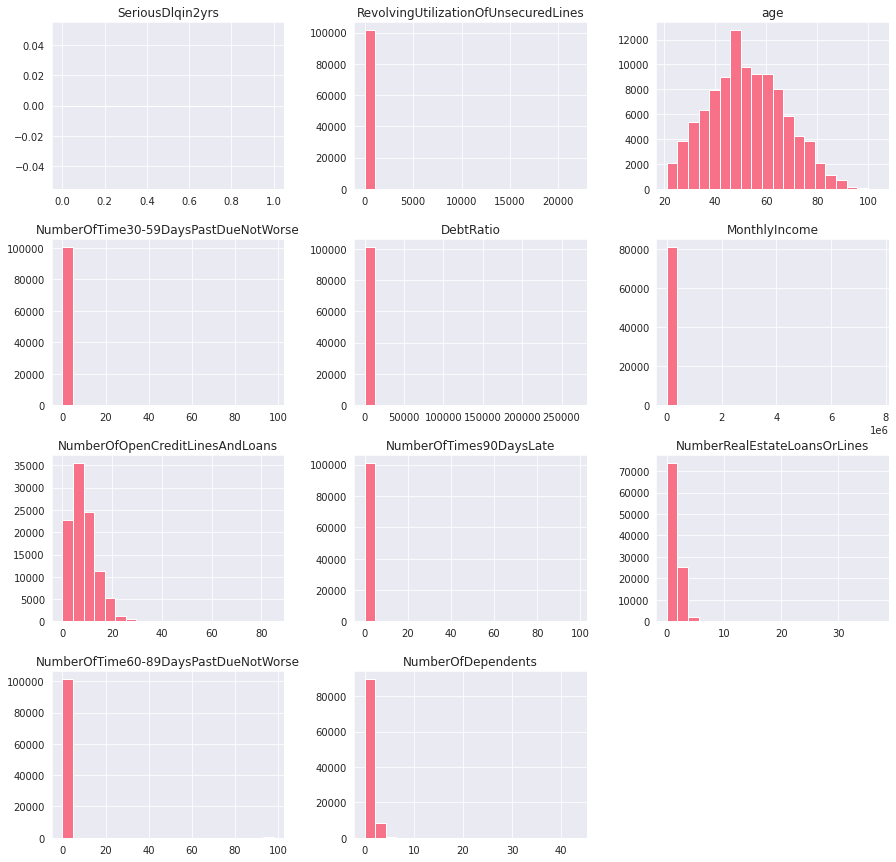

In [ ]:
# creating a histogram for all numeric columns in test set
test_data.hist(bins = 20, figsize = (15, 15))
plt.show()

Most of the columns are skewed to the right, so we will be using log transformation on thme in the preprocessing stage.

#### Age

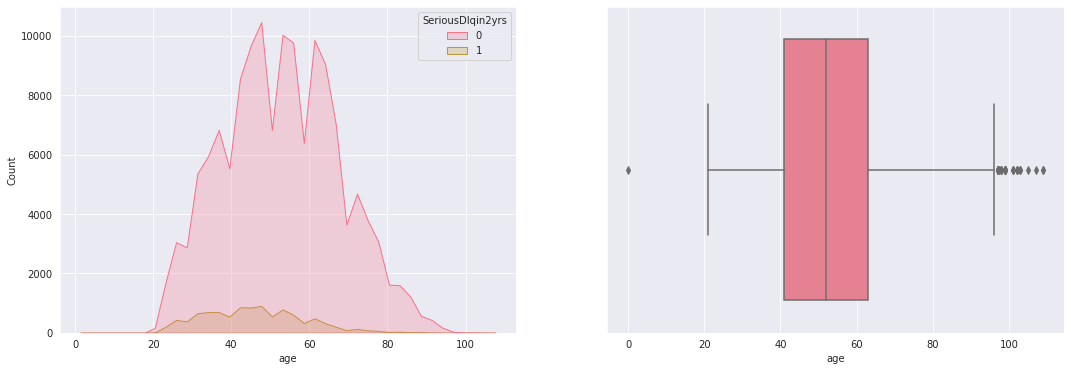

In [ ]:
# comparing age and 'SeriousDlqin2yrs' in train dataset
fig , ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = 'age', data = credit_data, bins = 40, hue = 'SeriousDlqin2yrs', element = 'poly', ax = ax[0])
sns.boxplot(x = 'age', data = credit_data, hue = 'SeriousDlqin2yrs', ax = ax[1])
plt.show()

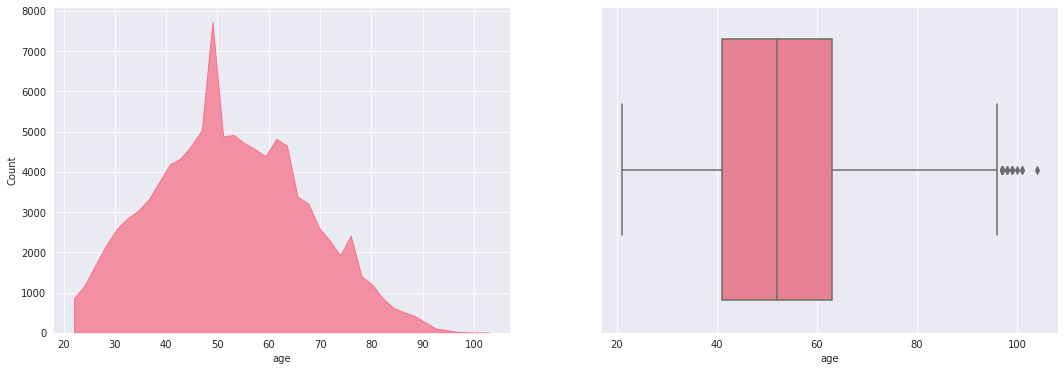

In [ ]:
# comparing age and 'SeriousDlqin2yrs' in test dataset
fig , ax = plt.subplots(1, 2, figsize = (18, 6))
sns.histplot(x = 'age', data = test_data, bins = 40, element = 'poly', ax = ax[0])
sns.boxplot(x = 'age', data = test_data, ax = ax[1])
plt.show()

There doesn't seem to be any difference between the distribution of ages of people who will be in serious financial crisis in two years that those that will not. Both curves seem to follow a normal distribution having more people around the median age and less people far away from the median age.
We also see an imbalance in the dataset.
The boxplot shows there are outliers. One of them being 0. That is going to be replaced with the age of the youngest person. We are going to leave the others as they are as its safe to assume that a few people could live up to over 100 and be in debt. 

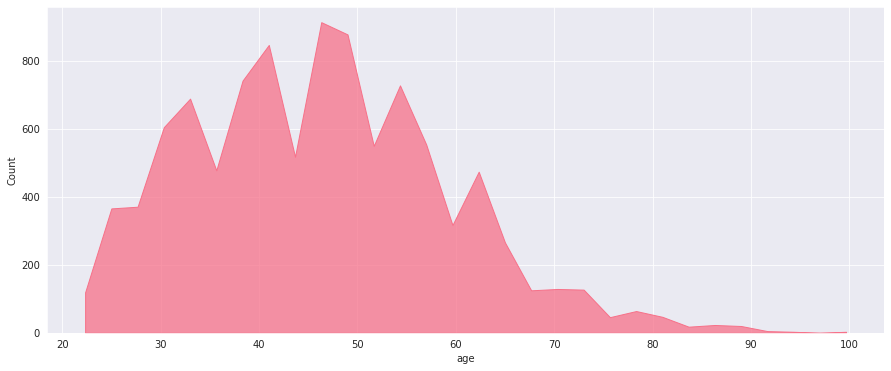

In [ ]:
# let's take a closer look at the ages of those with serious financial crisis in two years
# grouping those with serious deliquency
serious_df = credit_data[credit_data['SeriousDlqin2yrs'] == 1]
# grouping those without serious deliquency
not_serious_df = credit_data[credit_data['SeriousDlqin2yrs'] == 0]
# plotting an histogram
plt.figure(figsize = (15, 6))
sns.histplot(x = 'age', bins = 30, data = serious_df, element = 'poly')
plt.show()

The distribution quickly rise from 20s as the population grows amongst people in their thirties, with forties, fifties being the peak and slowly decrease amongst people who are above sixty and above. The distribution is positively skewed. These could be due to deaths, mortality increases as people age. 

#### Revolving Utilization Of Unsecured Lines

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


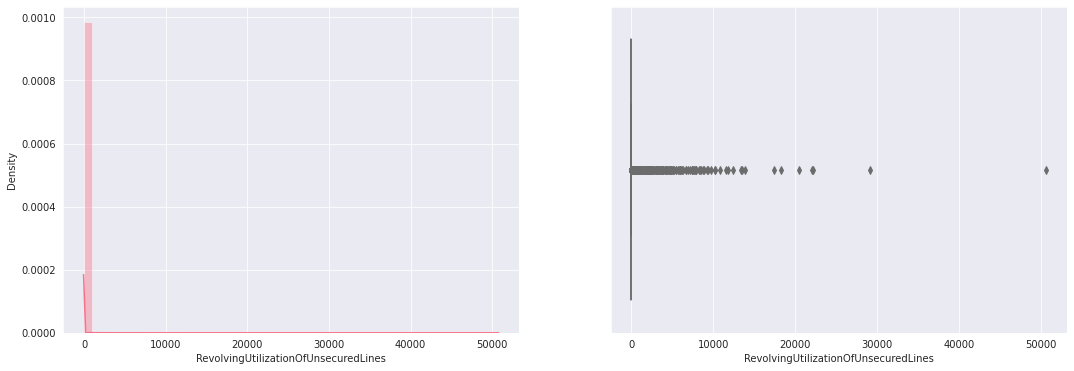

In [ ]:
# RevolvingUtilizationOfUnsecuredLines
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
# histogram of RevolvingUtilizationOfUnsecuredLines
sns.distplot(credit_data['RevolvingUtilizationOfUnsecuredLines'], ax = ax[0])
# boxplot of RevolvingUtilizationOfUnsecuredLines
sns.boxplot(x = 'RevolvingUtilizationOfUnsecuredLines', data = credit_data, ax = ax[1])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


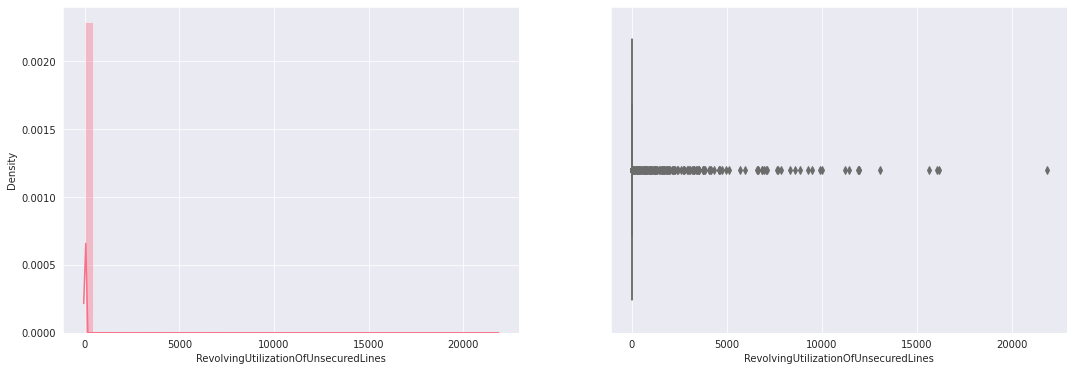

In [ ]:
# RevolvingUtilizationOfUnsecuredLines
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
# histogram of RevolvingUtilizationOfUnsecuredLines
sns.distplot(test_data['RevolvingUtilizationOfUnsecuredLines'], ax = ax[0])
# boxplot of RevolvingUtilizationOfUnsecuredLines
sns.boxplot(x = 'RevolvingUtilizationOfUnsecuredLines', data = test_data, ax = ax[1])
plt.show()

The above chart shows that most of the values are between 0 and 1 and there are outliers. Let's see their distribution

In [ ]:
credit_data[['RevolvingUtilizationOfUnsecuredLines']].describe().T

,count,mean,std,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0


We see from the above table that revolving untilization is as large as 50708. This shows that some of the individuals are in serious debt.

#### NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse

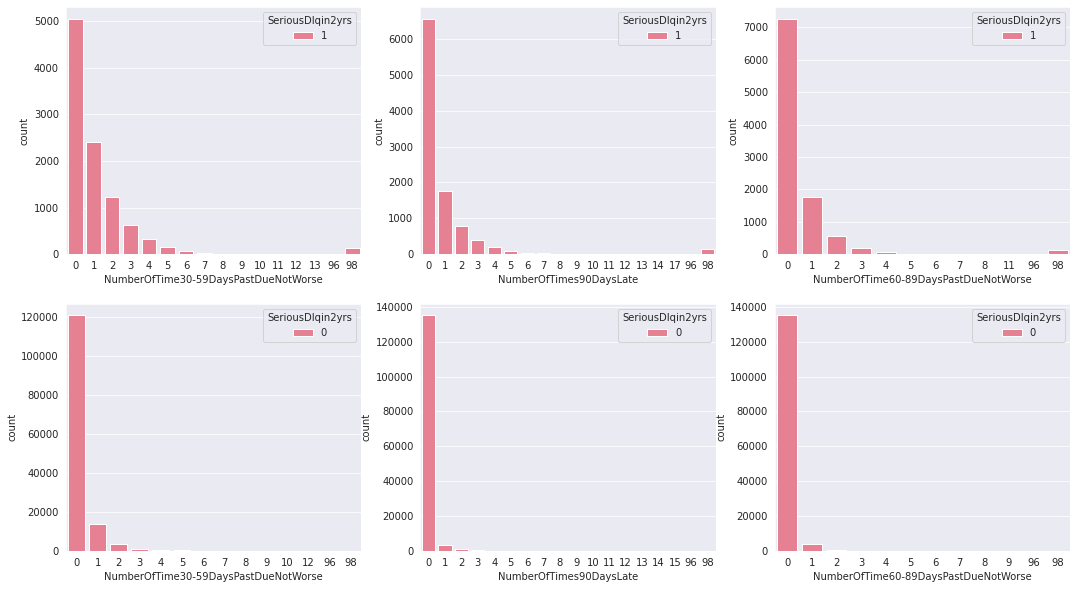

In [ ]:
# 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'
fig, ax = plt.subplots(2, 3, figsize = (18,  10))
sns.countplot(x = 'NumberOfTime30-59DaysPastDueNotWorse', data = serious_df, hue = 'SeriousDlqin2yrs', ax = ax[0, 0])
sns.countplot(x = 'NumberOfTimes90DaysLate', data = serious_df, hue = 'SeriousDlqin2yrs', ax = ax[0, 1])
sns.countplot(x = 'NumberOfTime60-89DaysPastDueNotWorse', data = serious_df, hue = 'SeriousDlqin2yrs', ax = ax[0, 2])
# 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'
sns.countplot(x = 'NumberOfTime30-59DaysPastDueNotWorse', data = not_serious_df, hue = 'SeriousDlqin2yrs', ax = ax[1, 0])
sns.countplot(x = 'NumberOfTimes90DaysLate', data = not_serious_df, hue = 'SeriousDlqin2yrs', ax = ax[1, 1])
sns.countplot(x = 'NumberOfTime60-89DaysPastDueNotWorse', data = not_serious_df, hue = 'SeriousDlqin2yrs', ax = ax[1, 2])
plt.show()

In [ ]:
serious_df_defaulters = serious_df[['NumberOfTime30-59DaysPastDueNotWorse']]
serious_df_defaulters['default'] = serious_df['NumberOfTime30-59DaysPastDueNotWorse'].apply(lambda x : 'No defaults' if x == 0 else 'Defaulted at least once')
print('Default rate for those in serious financial distress')
serious_df_defaulters['default'].value_counts(normalize = True)

Default rate for those in serious financial distress


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No defaults                0.502793
Defaulted at least once    0.497207
Name: default, dtype: float64

In [ ]:
not_serious_df_defaulters = not_serious_df[['NumberOfTime30-59DaysPastDueNotWorse']]
not_serious_df_defaulters['default'] = not_serious_df['NumberOfTime30-59DaysPastDueNotWorse'].apply(lambda x : 'No defaults' if x == 0 else 'Defaulted at least once')
print('Default rate for those not in serious financial crisis')
not_serious_df_defaulters['default'].value_counts(normalize = True)

Default rate for those not in serious financial crisis


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No defaults                0.864282
Defaulted at least once    0.135718
Name: default, dtype: float64

while 13% of those who are not in serious deliquency have defaulted by at least one day, 49% of those in serious deliquency have defaulted by at least one day. This shows that defaulters are likely to be in serious deliquency in two years.

#### DebtRatio

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


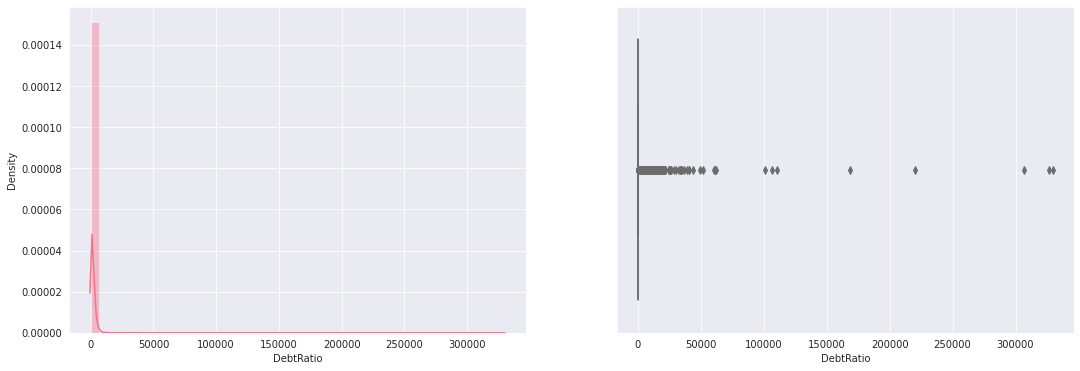

In [ ]:
# Debt ratio
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
# histogram of debt ratio
sns.distplot(credit_data['DebtRatio'], ax = ax[0])
# boxplot of debt ratio
sns.boxplot(x = 'DebtRatio', data = credit_data, ax = ax[1])
plt.show()

This too contains outliers. A closer look at how debt ratio is gotten could help here

In [ ]:
# describe
credit_data[['DebtRatio']].describe().T

,count,mean,std,min,25%,50%,75%,max
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0


Debt ratio is calculated as total debt/monthly income* 100. If a person has way higher debt than their monthly income, that individual will have a very high debt ratio of above 100%. Therefore it is reasonable to leave the outliers as they are since they might just be special cases of people living solely on debts.

#### Monthly Income

In [ ]:
credit_data[['MonthlyIncome']].describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.0,5400.0,8249.0,3008750.0


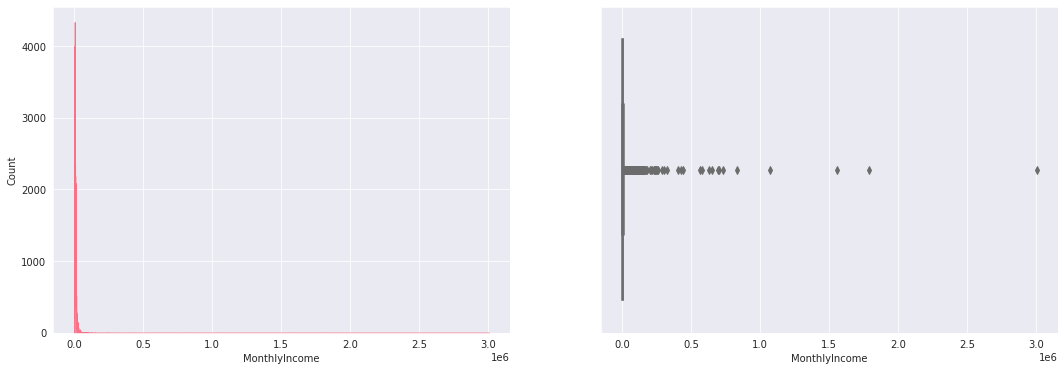

In [ ]:
# checking monthly income
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
# histogram
sns.histplot(x = 'MonthlyIncome', data = credit_data, element = 'poly', ax = ax[0])
# boxplot
sns.boxplot(x = 'MonthlyIncome', data = credit_data, ax = ax[1])
plt.show()

Most of the individuals earn below 10000, with very few earning above 10000 up to 3000000. This might just be a normal situation as people with high incomes might be doing high paying jobs or business people who are at senior levels in their field.

#### Number of open credit lines and loans

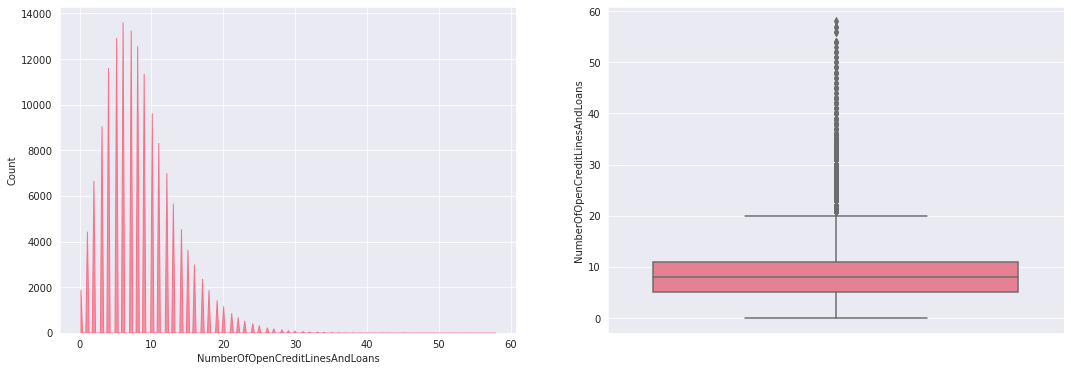

In [ ]:
# checking number of Open credit lines and loans
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
# histogram
sns.histplot(x = 'NumberOfOpenCreditLinesAndLoans', data = credit_data, element = 'poly', ax = ax[0])
# boxplot
sns.boxplot(y = 'NumberOfOpenCreditLinesAndLoans',hue = 'SeriousDlqin2yrs', data = credit_data, ax = ax[1] )
plt.show()

#### Number of Real Estate Loans or lines

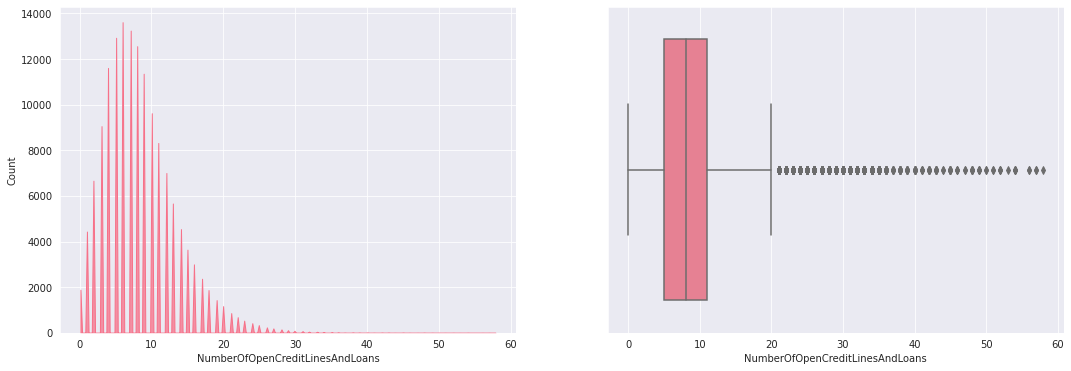

In [ ]:
# checking the distribution of NumberOfOpenCreditLinesAndLoans
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
# histogram
sns.histplot(x = 'NumberOfOpenCreditLinesAndLoans', data = credit_data, element = 'poly', ax = ax[0])
# boxplot
sns.boxplot(x = 'NumberOfOpenCreditLinesAndLoans', data = credit_data, ax = ax[1])
plt.show()

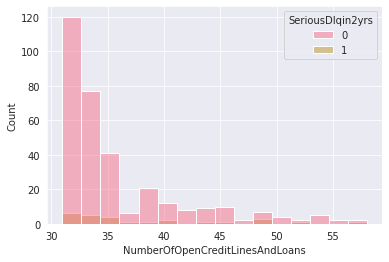

In [ ]:
condition = credit_data['NumberOfOpenCreditLinesAndLoans'] > 30
creditlineabove30 = credit_data[condition]
sns.histplot(creditlineabove30, x = 'NumberOfOpenCreditLinesAndLoans', hue = 'SeriousDlqin2yrs')

In [ ]:
g = px.histogram(credit_data, x = 'NumberOfOpenCreditLinesAndLoans', marginal='box', color = 'SeriousDlqin2yrs')
g.show()

#### Number of Dependents


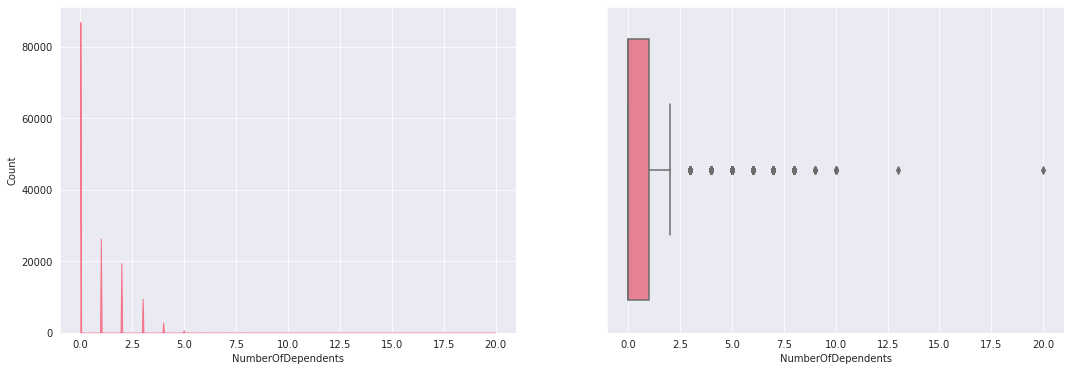

In [ ]:
# NumberOfDependents
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
# histogram
sns.histplot(x = 'NumberOfDependents', data = credit_data, element = 'poly', ax = ax[0])
# boxplot
sns.boxplot(x = 'NumberOfDependents', data = credit_data, ax = ax[1])
plt.show()

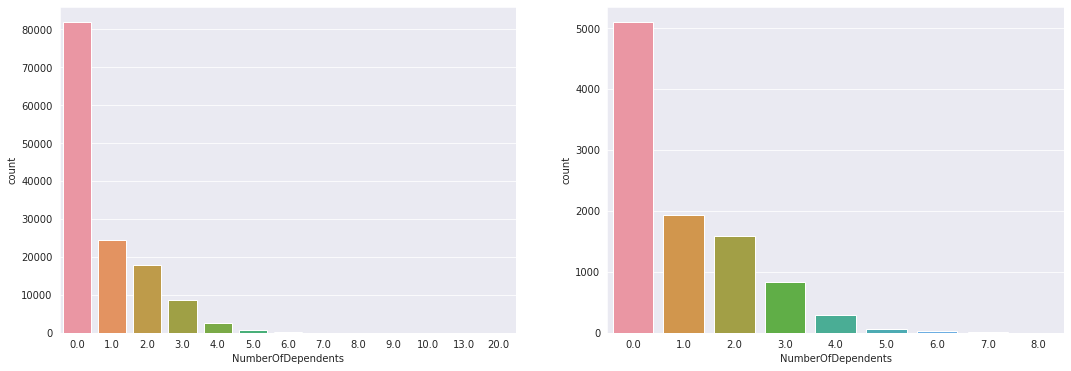

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.countplot(x = 'NumberOfDependents', data = not_serious_df, ax = ax[0])
sns.countplot(x = 'NumberOfDependents', data = serious_df, ax = ax[1])
plt.show()

There seem to be no difference in distribution on both sides

In [ ]:
g = px.histogram(credit_data, x = 'NumberOfDependents', marginal = 'box', color = 'SeriousDlqin2yrs')
g.show()

# Data Cleaning and Preprocessing

#### Duplicate rows

In [ ]:
# checking for duplicates
credit_data.duplicated().sum()

609

There 609 duplicated rows

In [ ]:
#checking for duplicate rows in test data
test_data.duplicated().sum()

328

There are 328 duplicate rows in test set

In [ ]:
# removing all duplicates except the first in both train and test data
credit_data.drop_duplicates(keep = 'first', inplace = True)
print(f'There are {credit_data.shape[0]} rows left in the train dataset after removing duplicates')

There are 149391 rows left in the train dataset after removing duplicates


#### Outliers

The age 0 of the train set will will replaced with the min age 18

In [ ]:
# replace the age 0 with 18
credit_data['age'].replace(0,18, inplace = True)

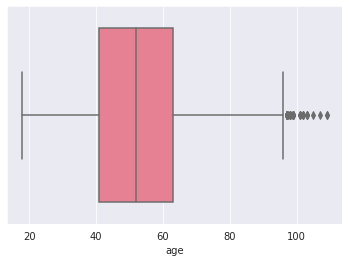

In [ ]:
sns.boxplot( x = 'age', data = credit_data)
plt.show()

#### Missing Values

In [ ]:
# Replacing missing data in monthly income with the mean in train data
mean_monthly_income = credit_data.MonthlyIncome.mean()
credit_data['MonthlyIncome'].fillna(mean_monthly_income, inplace = True)

# Replacing missing data in number of dependents with mode in train data
mode_number_of_dependents = credit_data.NumberOfDependents.mode().astype(int).max()
credit_data['NumberOfDependents'].fillna(mode_number_of_dependents, inplace = True)

In [ ]:
# checking for missing data
credit_data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [ ]:
# Replacing missing data in monthly income with the mean in test data
test_mean_monthly_income = test_data.MonthlyIncome.mean()
test_data['MonthlyIncome'].fillna(test_mean_monthly_income, inplace = True)

# Replacing missing data in number of dependents with mode in test data
test_mode_number_of_dependents = test_data.NumberOfDependents.mode().astype(int).max()
test_data['NumberOfDependents'].fillna(test_mode_number_of_dependents, inplace = True)

In [ ]:
# checking for missing data
test_data.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

#### Data Transformation

In [ ]:
# columns to transform using log transformation
to_transform = ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfOpenCreditLinesAndLoans','DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', \
                'NumberRealEstateLoansOrLines', 'NumberOfDependents']
to_scale = ['age']

# log transformation
from sklearn.preprocessing import PowerTransformer
# instantiating a PowerTransformer
transformer = PowerTransformer(method='yeo-johnson', standardize=True)
# transformed train data
train_transformed_data = transformer.fit_transform(credit_data[to_transform])
train_transformed_df = pd.DataFrame(train_transformed_data, columns = to_transform)
# transformed test data
test_transformed_data = transformer.fit_transform(test_data[to_transform])
test_transformed_df = pd.DataFrame(test_transformed_data, columns = to_transform)

# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaling age column of train data
train_scaled_data = scaler.fit_transform(credit_data[to_scale])
train_scaled_df = pd.DataFrame(train_scaled_data, columns = to_scale)
# scaling age column of test data
test_scaled_data = scaler.fit_transform(test_data[to_scale])
test_scaled_df = pd.DataFrame(test_scaled_data, columns = to_scale)

# concatenate both in train data to form new dataframe X
X = pd.concat([train_transformed_df, train_scaled_df], axis = 1)

# concatenate both in test data to form new dataframe test_df
test_df = pd.concat([test_transformed_df, test_scaled_df], axis = 1)

In [ ]:
# preview
X.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfOpenCreditLinesAndLoans,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents,age
0,1.302919,0.948026,-0.003238,0.715539,-0.242280,2.410297,1.360039,-0.496168
1,1.510371,-0.884821,-0.736695,-0.951433,-0.242280,-1.186008,0.931938,-0.835714
2,1.151271,-1.572059,-0.797309,-0.782054,4.127445,-1.186008,-0.798261,-0.971532
3,0.095903,-0.607467,-0.883718,-0.690350,-0.242280,-1.186008,-0.798261,-1.514806
4,1.462356,-0.131294,-0.904259,5.382000,-0.242280,0.293017,-0.798261,-0.224532


In [ ]:
X.shape

(149391, 8)

#### Data Imbalance

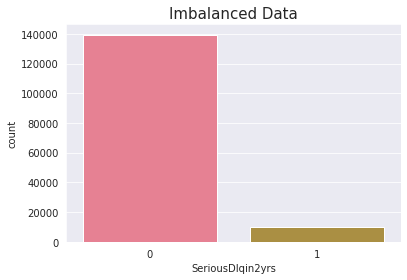

In [ ]:
# countplot of SeriousDlqin2yrs
sns.countplot(x = 'SeriousDlqin2yrs', data = credit_data)
plt.title('Imbalanced Data', size = 15)
plt.show()

We see an imbalance in the data given. We will be solving this using SMOTE from the over_sampling library in imblearn

In [ ]:
# seperate SeriousDlqin2yrs as target
y = credit_data['SeriousDlqin2yrs']
# importing SMOTE to create balance in dataset
from imblearn.over_sampling import SMOTE
# create an instance of SMOTE with random state of 42
balancer = SMOTE(random_state = 42)
# fit data to balancer with
X_res, y_res = balancer.fit_resample(X, y)

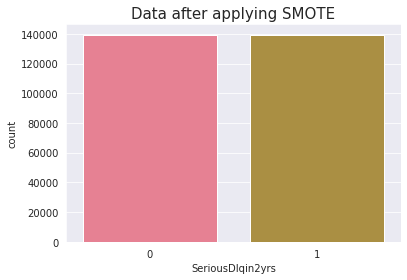

In [ ]:
# concatenating X_res and y_res
df = pd.concat([X_res, y_res], axis = 1)
# countplot to display the new balanced data
sns.countplot(x = 'SeriousDlqin2yrs', data = df)
plt.title('Data after applying SMOTE', size = 15)
plt.show()

Data is now balanced

#### Splitting Data into Test and Validation set

In [ ]:
# split to features and target
X_ = df.drop("SeriousDlqin2yrs", axis = 1)
y_ = df['SeriousDlqin2yrs']
# splitting into train and validation sets
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(X_, y_, test_size = 0.3, random_state = 42)

In [ ]:
print(f'Shape of train set {Xtrain.shape}, {ytrain.shape}')
print(f'Shape of validation set {Xval.shape}, {yval.shape}')

Shape of train set (195134, 8), (195134,)
Shape of validation set (83630, 8), (83630,)


### Machine Learning

#### Creating a Function modeller to Standardize features and fit a model

In [ ]:
# create a class for model, method of class will return scores, classification report, and confusion matrix
# Class classifier
class Classifier:
  
  def __init__(self, m):
    self.m = m
    
  def modeller(self):
    """ Function takes in a machine learning classification algorithm, fits to both train and validation set,
        and returns a dataframe of all the evaluation metrics for both train and validation set """
    model = self.m.fit(Xtrain, ytrain) # fit model
    global ypred_train
    global ypred_val
    ypred_train, ypred_val = model.predict(Xtrain), model.predict(Xval) # predict model on train and validation set
    # predict probability for both train and validation 
    global ypred_proba_train
    global ypred_proba_val
    ypred_proba_train, ypred_proba_val = model.predict_proba(Xtrain)[:, 1], model.predict_proba(Xval)[:, 1] # predict probability
    acc_score_train, acc_score_val = accuracy_score(ytrain, ypred_train), accuracy_score(yval, ypred_val) # accuracy 
    precision_train, precision_val = precision_score(ytrain, ypred_train), precision_score(yval, ypred_val) # precision
    recall_train, recall_val = recall_score(ytrain, ypred_train), recall_score(yval, ypred_val) # recall 
    f1_train, f1_val = f1_score(ytrain, ypred_train), f1_score(yval, ypred_val) # f1 score
    auc_train, auc_val = roc_auc_score(ytrain, ypred_proba_train), roc_auc_score(yval, ypred_proba_val) # roc_auc_score
    # create a dataframe for all the metrics for both train and validation data set
    evaluation_df = pd.DataFrame({'Train set': [acc_score_train, precision_train, recall_train, f1_train, auc_train], \
                                  'Validation set': [acc_score_val, precision_val, recall_val, f1_val, auc_val]}, \
                                 index = ['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'ROC AUC Score'])
    return(evaluation_df) # return dataframe
  
  def area_under_curve(self):
    """ draw roc curve """ 
    x, y, thresholds = roc_curve(yval, ypred_proba_val)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(x, y)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
  
  def reporter(self):
    """ function returns classification report """
    report = classification_report(yval, ypred_val)
    print(report)

  def matrix(self):
    """ function returns the confusion matrix """
    matrix = confusion_matrix(yval, ypred_val)
    return(matrix)

#### Logistic Regression

In [ ]:
# instantiate a Logistic regressor
lr = Classifier(LogisticRegression())
# show evaluation metric for Logistic Regressor
lr_metrics = lr.modeller()
lr_metrics

Evaluation for Logistic Regressor


,Train set,Validation set
Accuracy Score,0.756496,0.754311
Precision Score,0.745591,0.745398
Recall Score,0.777817,0.774534
F1 Score,0.761363,0.759687
ROC AUC Score,0.827051,0.827142


#### Decision Tree Classifier

In [ ]:
# instantiate a decision tree classifer
dt = Classifier(DecisionTreeClassifier())
# show metrics for decision tree classifier
dt_metrics = dt.modeller()
dt_metrics

,Train set,Validation set
Accuracy Score,0.999862,0.907115
Precision Score,0.999918,0.898886
Recall Score,0.999805,0.918008
F1 Score,0.999861,0.908347
ROC AUC Score,1.000000,0.907206


#### KNeighbors Classifier

KNN model with different number of n_neigbors

In [ ]:
no_of_neighbors = []
knnacc_val = []
knnprec_val = []
knnrec_val = []
knnf1_val = []
knnauc_val = []
# run a for loop
for k in range(1, 10):
  no_of_neighbors.append(k)
  # instantiate a knn model
  knn_model = Classifier(KNeighborsClassifier(n_neighbors = k))
  # return all metrics for each n neigbors 
  scores = knn_model.modeller()
  knnacc_val.append(scores.iloc[0, 1])
  knnprec_val.append(scores.iloc[1, 1])
  knnrec_val.append(scores.iloc[2, 1])
  knnf1_val.append(scores.iloc[3, 1])
  knnauc_val.append(scores.iloc[4, 1])

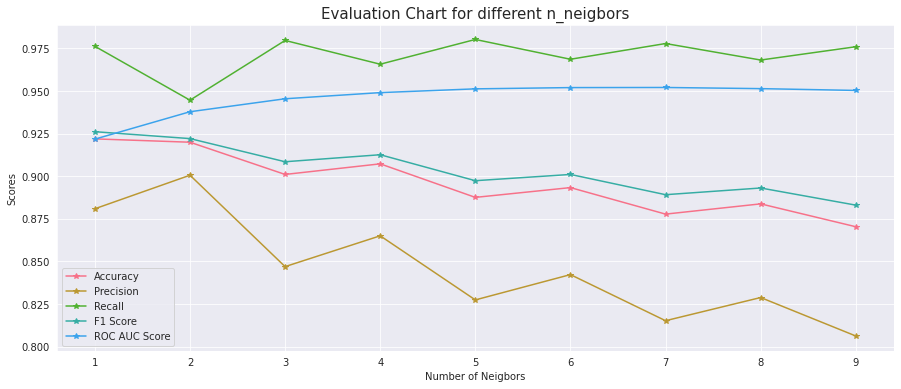

In [ ]:
# plotting a graph of all values
plt.figure(figsize = (15,6))
plt.plot(no_of_neighbors, knnacc_val, label = 'Accuracy Score', marker = '*')
plt.plot(no_of_neighbors, knnprec_val, label = 'Precision Score', marker = '*')
plt.plot(no_of_neighbors, knnrec_val, label = 'Recall Score', marker = '*')
plt.plot(no_of_neighbors, knnf1_val, label = 'F1 Score', marker = '*')
plt.plot(no_of_neighbors, knnauc_val, label = 'ROC Score', marker = '*')
plt.legend(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])
plt.xlabel('Number of Neigbors')
plt.ylabel('Scores')
plt.title('Evaluation Chart for different n_neigbors', size = 15)
plt.show()

2 came up the best accuracy score and recall. Even its precision score is 0.90 which isn't that far from the rest.

In [ ]:
# instantiate a knn model
knn = Classifier(KNeighborsClassifier(n_neighbors = 2))
# display metrics 
knn_metrics = knn.modeller()
knn_metrics

,Train set,Validation set
Accuracy Score,0.987967,0.919909
Precision Score,0.999968,0.900548
Recall Score,0.975937,0.944576
F1 Score,0.987806,0.922037
ROC AUC Score,0.998380,0.937798


#### Random Forest Classifier

In [ ]:
# import the random forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate a random forest classifier
rf = Classifier(RandomForestClassifier()) # criterion = 'gini', max_depth = None, n_estimators = 100
# display metrics
rf_metrics = rf.modeller()
rf_metrics

,Train set,Validation set
Accuracy Score,0.999857,0.945163
Precision Score,0.999774,0.937490
Recall Score,0.999938,0.954258
F1 Score,0.999856,0.945800
ROC AUC Score,0.999997,0.987547


#### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = Classifier(XGBClassifier())
# display metrics
xgb_metrics = xgb.modeller()
xgb_metrics

,Train set,Validation set
Accuracy Score,0.845265,0.843394
Precision Score,0.851649,0.850591
Recall Score,0.835743,0.834180
F1 Score,0.843621,0.842306
ROC AUC Score,0.927937,0.926843


#### Evaluating Models

In [ ]:
# dataframe to display all metrics
train_metric_df = pd.DataFrame([lr_metrics['Train set'], dt_metrics['Train set'], knn_metrics['Train set'], rf_metrics['Train set'], xgb_metrics['Train set']],\
                               index = ['LogisticRegression', 'Decision Tree Classifier', 'KNeighbors Classifier', 'Random Forest Classifier', 'XGBoost Classifier'])
train_metric_df

,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC AUC Score
LogisticRegression,0.756496,0.745591,0.777817,0.761363,0.827051
Decision Tree Classifier,0.999862,0.999918,0.999805,0.999861,1.000000
KNeighbors Classifier,0.987967,0.999968,0.975937,0.987806,0.998380
Random Forest Classifier,0.999857,0.999774,0.999938,0.999856,0.999997
XGBoost Classifier,0.845265,0.851649,0.835743,0.843621,0.927937


In [ ]:
# dataframe to display all metrics
validation_metric_df = pd.DataFrame([lr_metrics['Validation set'], dt_metrics['Validation set'], knn_metrics['Validation set'], rf_metrics['Validation set'], xgb_metrics['Validation set']],\
                               index = ['LogisticRegression', 'Decision Tree Classifier', 'KNeighbors Classifier', 'Random Forest Classifier', 'XGBoost Classifier'])
validation_metric_df

,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC AUC Score
LogisticRegression,0.754311,0.745398,0.774534,0.759687,0.827142
Decision Tree Classifier,0.907115,0.898886,0.918008,0.908347,0.907206
KNeighbors Classifier,0.919909,0.900548,0.944576,0.922037,0.937798
Random Forest Classifier,0.945163,0.937490,0.954258,0.945800,0.987547
XGBoost Classifier,0.843394,0.850591,0.834180,0.842306,0.926843


The Random Forest Classifier performs the best
lets see if we can use some hyperparameter tuning to improve the model

#### Hyperparameter Tuning

In [ ]:
# increasing the n_estimators to 1000
rf1 = Classifier(RandomForestClassifier(n_estimators = 1000))
# displaying metrics
rf1_metrics = rf1.modeller()
rf1_metrics

,Train set,Validation set
Accuracy Score,0.999862,0.946514
Precision Score,0.999774,0.938372
Recall Score,0.999949,0.956118
F1 Score,0.999861,0.947162
ROC AUC Score,0.999997,0.988375


Increasing the number of trees improves the model by 0.0012

In [ ]:
# increasing the n_estimators and changing criterion to Entropy
rf2 = Classifier(RandomForestClassifier(n_estimators = 1000, criterion = 'entropy'))
# show metrics
rf2_metrics = rf2.modeller()
rf2_metrics

,Train set,Validation set
Accuracy Score,0.999862,0.946526
Precision Score,0.999774,0.937922
Recall Score,0.999949,0.956667
F1 Score,0.999861,0.947202
ROC AUC Score,0.999997,0.988590


Model improves a little bit

#### Confusion Matrix

[[39044  2655]
 [ 1817 40114]]


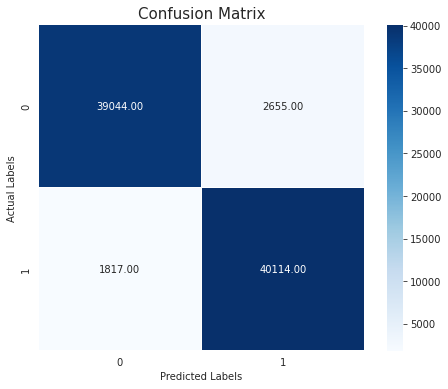

In [ ]:
# confusion matrix
matrix = rf.matrix()
# create heatmap of confusion matrix
print(matrix)
plt.figure(figsize = (8, 6))
sns.heatmap(matrix, cmap = 'Blues', fmt = '.2f', linewidths = 0.5, square = True, annot = True)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix', size = 15)
plt.show()

#### Classification Report

In [ ]:
# classification report 
report = rf.reporter()
print(report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     41699
           1       0.94      0.96      0.95     41931

    accuracy                           0.95     83630
   macro avg       0.95      0.95      0.95     83630
weighted avg       0.95      0.95      0.95     83630

None


#### ROC Curve 

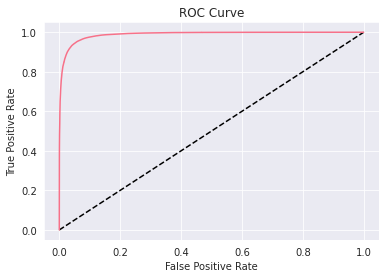

None


In [ ]:
# roc curve
curve = rf.area_under_curve()
print(curve)